In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import stored data
df_ipcc = pd.read_csv('exiobase_inventory_scores.csv')
df_ipcc = df_ipcc.rename(columns={'Unnamed: 0':'activity'})
df_ipcc = df_ipcc.set_index('activity')
df_ipcc.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
activity,,,,,,,,,,,,,,,,,,,,,
1999,0.000184,0.004662,0.032859,0.005780,0.000330,0.108512,1.744283,0.000660,0.045615,0.053855,...,0.004624,0.004662,0.000007,0.000007,0.004010,1.150218e-09,0.000002,9.621835e-09,0.000041,8.978172e-07
572,1.383679,-0.260024,-33.362579,-2.966688,-0.839345,-157.809731,-1.179979,-1.678691,-3.508513,101.019461,...,-1.281058,-0.260024,-0.000535,-0.000535,23.469543,1.204124e-06,0.044275,1.708505e-05,-907.901303,7.504524e-03
7562,0.367302,0.031664,103.892944,21.123048,0.711423,256.885736,0.987476,1.422847,76.764317,149.188354,...,8.855054,0.031664,0.000151,0.000151,10.124644,2.725705e-06,0.005653,2.780822e-05,0.092272,6.158178e-04
2817,0.481988,0.148265,356.065851,37.134584,2.524170,71.966726,2.981640,5.048339,203.011663,96.310567,...,3.219319,0.148265,0.000437,0.000437,16.562970,1.948675e-06,0.005832,1.125220e-05,0.140924,5.235760e-04
4526,1.957198,0.776880,614.403005,78.025672,21.852799,1580.959955,181.022078,43.705598,3189.702273,896.535484,...,21.094571,0.776880,0.001578,0.001578,50.128792,8.205923e-06,0.039118,9.150129e-05,0.731665,6.769858e-03


In [3]:
# change the columns from str to int, better for visualization
col_dict = {}
for i in range(len(df_ipcc.columns)):
    col_dict[df_ipcc.columns[i]]=i
df_ipcc = df_ipcc.rename(columns = col_dict)

Text(0.5, 0, 'Elementary flows')

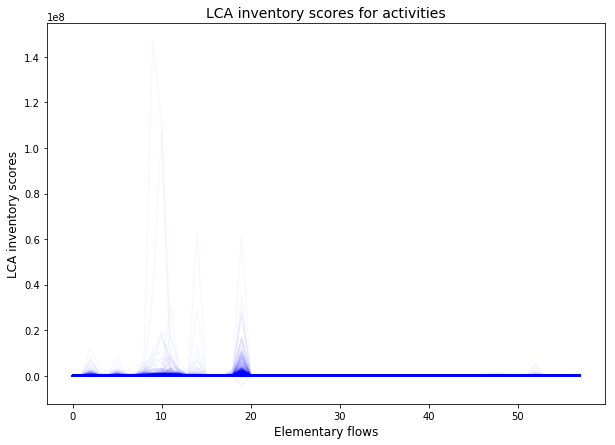

In [4]:
# original graph for all activities
df_ipcc.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('LCA inventory scores for activities',fontsize = 14)
plt.ylabel('LCA inventory scores',fontsize = 12)
plt.xlabel('Elementary flows',fontsize = 12)

In [5]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler()
x = df_ipcc.values.copy()
X = sc.fit_transform(x)
df_scaled = df_ipcc.copy()
for i in range(X.shape[1]):
    df_scaled[i]=X.T[i]
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
activity,,,,,,,,,,,,,,,,,,,,,
1999,0.008344,0.001496,0.065751,0.030073,0.002387,0.053319,0.002893,0.002387,0.018818,0.002322,...,0.011441,0.001496,0.015202,0.015202,0.003630,0.147056,0.051332,0.150237,0.016774,0.033095
572,0.008352,0.001493,0.065749,0.030072,0.002387,0.053303,0.002891,0.002387,0.018817,0.002323,...,0.011441,0.001493,0.015201,0.015201,0.003634,0.147056,0.051342,0.150237,0.005330,0.033102
7562,0.008346,0.001497,0.065759,0.030078,0.002388,0.053346,0.002892,0.002388,0.018830,0.002323,...,0.011448,0.001497,0.015203,0.015203,0.003631,0.147056,0.051333,0.150237,0.016775,0.033095
2817,0.008347,0.001498,0.065779,0.030083,0.002389,0.053327,0.002893,0.002389,0.018851,0.002323,...,0.011444,0.001498,0.015203,0.015203,0.003633,0.147056,0.051333,0.150237,0.016776,0.033095
4526,0.008355,0.001506,0.065799,0.030094,0.002398,0.053483,0.002968,0.002398,0.019338,0.002328,...,0.011457,0.001506,0.015206,0.015206,0.003639,0.147056,0.051341,0.150237,0.016783,0.033101


Text(0.5, 0, 'Elementary flows')

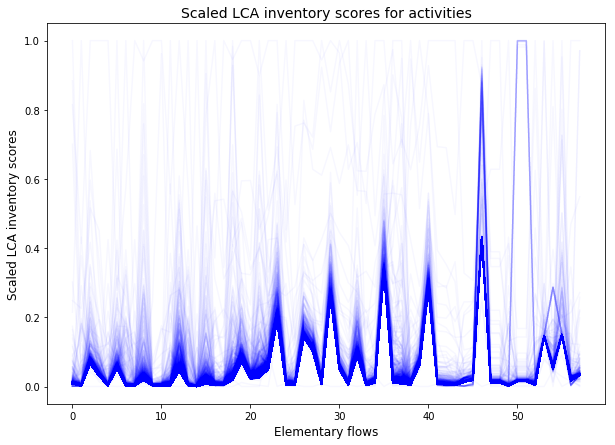

In [7]:
# scaled features for all activities
df_scaled.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('Scaled LCA inventory scores for activities',fontsize = 14)
plt.ylabel('Scaled LCA inventory scores',fontsize = 12)
plt.xlabel('Elementary flows',fontsize = 12)

In [8]:
# drop the zero columns if there is
drop_list = []
data = df_scaled.values.copy()
for i in range(data.shape[1]):
    if df_scaled[i].sum() == 0 and max(df_scaled[i]) == 0 and min(df_scaled[i]) == 0:
        drop_list.append(i)
len(drop_list)

0

In [9]:
# correlation analysis and drop one of the highly correlated paired columns
corr_mtx = df_scaled.corr()
corrmtx = corr_mtx.values.copy()
corr_i = []
corr_j = []
for i in range(corr_mtx.shape[0]):
    for j in range(corr_mtx.shape[1]):
        if corrmtx[i,j] > 0.99 and i != j:
            print (df_scaled.columns[i],'-',df_scaled.columns[j])
            corr_i.append(df_scaled.columns[i])
            corr_j.append(df_scaled.columns[j])

1 - 49
4 - 7
6 - 13
7 - 4
13 - 6
17 - 43
28 - 30
30 - 28
31 - 38
38 - 31
41 - 42
42 - 41
43 - 17
44 - 45
45 - 44
47 - 48
48 - 47
49 - 1
50 - 51
51 - 50


In [10]:
drop_list = []
for i in range(len(corr_i)):
    if corr_j[i] not in drop_list and corr_i[i] not in drop_list:
        drop_list.append(corr_j[i])
len(drop_list)

10

In [11]:
drop_list

[49, 7, 13, 43, 30, 38, 42, 45, 48, 51]

In [12]:
df_drop_corr = df_scaled.copy()
df_drop_corr = df_drop_corr.drop(columns = drop_list) # drop one column from high correlated pairs 
df_drop_corr.head()

,0,1,2,3,4,5,6,8,9,10,...,44,46,47,50,52,53,54,55,56,57
activity,,,,,,,,,,,,,,,,,,,,,
1999,0.008344,0.001496,0.065751,0.030073,0.002387,0.053319,0.002893,0.018818,0.002322,0.002263,...,0.012750,0.431751,0.011441,0.015202,0.003630,0.147056,0.051332,0.150237,0.016774,0.033095
572,0.008352,0.001493,0.065749,0.030072,0.002387,0.053303,0.002891,0.018817,0.002323,0.002264,...,0.012753,0.431751,0.011441,0.015201,0.003634,0.147056,0.051342,0.150237,0.005330,0.033102
7562,0.008346,0.001497,0.065759,0.030078,0.002388,0.053346,0.002892,0.018830,0.002323,0.002264,...,0.012750,0.431751,0.011448,0.015203,0.003631,0.147056,0.051333,0.150237,0.016775,0.033095
2817,0.008347,0.001498,0.065779,0.030083,0.002389,0.053327,0.002893,0.018851,0.002323,0.002264,...,0.025893,0.431751,0.011444,0.015203,0.003633,0.147056,0.051333,0.150237,0.016776,0.033095
4526,0.008355,0.001506,0.065799,0.030094,0.002398,0.053483,0.002968,0.019338,0.002328,0.002271,...,0.012755,0.431752,0.011457,0.015206,0.003639,0.147056,0.051341,0.150237,0.016783,0.033101


Text(0.5, 0, 'Elementary flows')

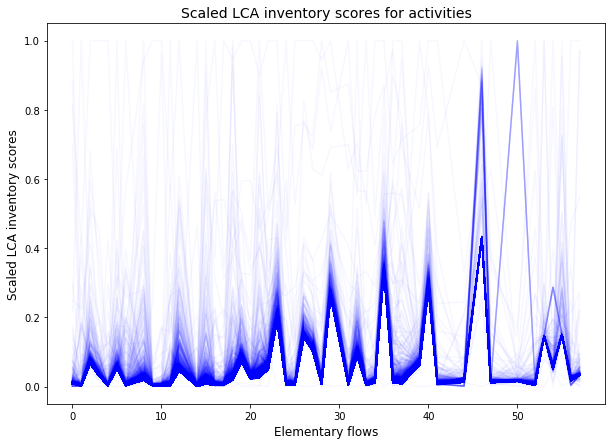

In [13]:
# droped correlated features for all activities, quite similar
df_drop_corr.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('Scaled LCA inventory scores for activities',fontsize = 14)
plt.ylabel('Scaled LCA inventory scores',fontsize = 12)
plt.xlabel('Elementary flows',fontsize = 12)

In [15]:
# clustering by DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [16]:
X_dbscan = df_drop_corr.values.copy()

db = DBSCAN(eps = 0.05, min_samples = 5).fit(X_dbscan) # eps and min_samples are important parameters for clusters, 
                                                       # higher min_samples and lower eps indicate higher density
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# performance indexes for clustering
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_dbscan, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_dbscan, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_dbscan, labels))

Estimated number of clusters: 4
Estimated number of noise points: 312
Silhouette Coefficient: 0.865
Calinski harabasz score: 504.987
Davies bouldin score: 1.249


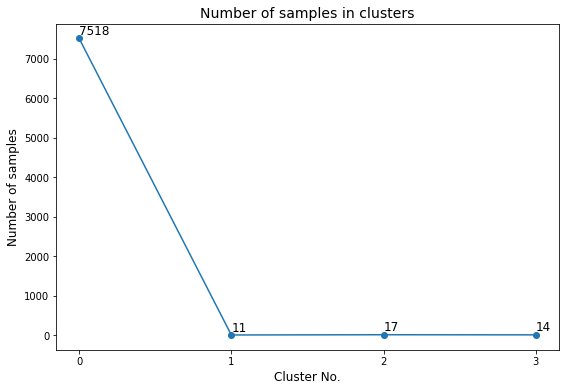

In [19]:
# get the distribution of samples in each cluster
x = [i for i in range(n_clusters_)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,'o-')
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
plt.xticks(np.arange(0, n_clusters_, 1))
for i in x:
    plt.text(i,y[i]+100,str(y[i]),fontsize = 12)
plt.show()
# 1 cluster with most samples (7518 out of 7872), 312 outliers,
# and three other clusters with a few samples (less than 20)
# which seems not reasonable

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
X_agglo_ward = df_drop_corr.values.copy()
# distance_threshold is the parameter to distinguish samples for different clusters
clustering = AgglomerativeClustering(linkage='ward', distance_threshold = 1,compute_full_tree =True, n_clusters = None)
clustering.fit(X_agglo_ward)
labels = clustering.labels_
n_clusters = max(labels)+1
print (n_clusters,'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_agglo_ward, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_agglo_ward, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_agglo_ward, labels))

35 clusetrs
0 outliers
Silhouette Coefficient: 0.726
Calinski harabasz score: 2531.875
Davies bouldin score: 0.793


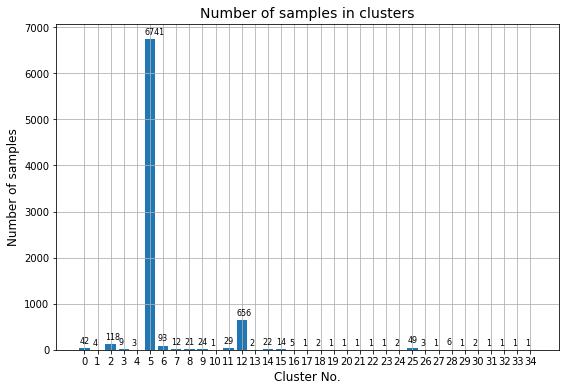

In [25]:
# get the distribution of samples in each cluster
x = [i for i in range(n_clusters)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.bar(x,y)
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
plt.xticks(np.arange(0, n_clusters, 1))
for i in x:
    plt.text(i-0.4,y[i]+100,str(y[i]),fontsize = 8)
plt.grid(True)
plt.show()
# 1 cluster with most samples (6741 out of 7872), no outliers,
# many clusters with a few samples (less than 20), 13 clusters only have 1 sample
# which is not reasonable

In [26]:
from sklearn.cluster import OPTICS

In [27]:
X_optics = df_drop_corr.values.copy()
optics = OPTICS(min_samples=20,
                xi=0.05,
                min_cluster_size=5)
optics.fit(X_optics)
labels = optics.labels_
print (max(labels)+1,'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_optics, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_optics, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_optics, labels))
# result is not good as too many outliers

C:\Anaconda3\lib\site-packages\sklearn\cluster\optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


39 clusetrs
5190 outliers
Silhouette Coefficient: -0.223
Calinski harabasz score: 11.509
Davies bouldin score: 2.132
